# Exercise 2: Markov Chains and Markov Decision Processes (MDP) 

## 1) Markov Chain: State Transition
Define the state transition probability $\mathcal{P}_{xx'}$ of the graph shown in the figure below.

![](Last_Beer_Graph.png)

With $p_k = \begin{bmatrix}
\text{Pr}_k \lbrace \text{Inital Beer} \rbrace \\
\text{Pr}_k \lbrace \text{Meet Friends} \rbrace \\
\text{Pr}_k \lbrace \text{Pizza} \rbrace \\
\text{Pr}_k \lbrace \text{Another Beer} \rbrace \\
\text{Pr}_k \lbrace \text{"Last Beer"}\rbrace \\
\text{Pr}_k \lbrace \text{Sleep} \rbrace \\
\end{bmatrix}^\text{T}$

## Solution 1)

The state transition probability $\mathcal{P}_{xx'} = \begin{bmatrix}
0 & 0.6 & 0.3 & 0 & 0 & 0.1 \\
0 & 0 & 0.4 & 0.4 & 0.1 & 0.1 \\
0 & 0 & 0 & 0.7 & 0 & 0.3 \\
0 & 0 & 0 & 0.6 & 0.3 & 0.1 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}$ 



## 2 ) Markov Chain: Stationary State
Using $p = p \mathcal{P}$, calculate the stationary state probability.

Please note that the sum of the state propabilities equals one for every specific point in time.

## Solution 2)

\begin{align}
p &= p \mathcal{P} \\
p \left( I_\text{6} - \mathcal{P}_{xx'} \right) &= 0
\end{align}

With:

$\left( I_\text{6} - \mathcal{P}_{xx'} \right) = \begin{bmatrix}
1 & -0.6 & -0.3 & 0 & 0 & -0.1 \\
0 & 1 & -0.4 & -0.4 & -0.1 & -0.1 \\
0 & 0 & 1 & -0.7 & 0 & -0.3 \\
0 & 0 & 0 & 0.4 & -0.3 & -0.1 \\
0 & 0 & 0 & 0 & 1 & -1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}$ 

Solving for $p$ yields, that $p_{1,...,5} = 0$.

Due to $\sum_n p_n = 1$: $p_6 = 1$

### What does this mean?

In the end we all go to sleep, makes sense.



## 3) Markov Reward Process: Evaluating States

Given the reward distribution $r_\mathcal{X}$, calculate the state-values $v_\mathcal{X}$.  

The states are defined by:
$\mathcal{X} = \left\lbrace \begin{matrix}
\text{Inital Beer}\\
\text{Meet Friends}\\
\text{Pizza}\\
\text{Another Beer}\\
\text{"Last Beer"}\\
\text{Sleep}\\
\end{matrix}
\right\rbrace$

The rewards are defined by:
$r_\mathcal{X} = \begin{bmatrix}
+1\\
+1\\
+2\\
+1\\
-3\\
0\\
\end{bmatrix}$

The state-value is defined by the state-value Bellman equation: $v_\mathcal{X} = r_\mathcal{X} + \gamma \mathcal{P}_{xx'} v_\mathcal{X}$. Assume that $\gamma = 0.9$ and write a Python program to calculate $v_\mathcal{X}$. Which state is most promising? Why?

Which state is most promising when $\gamma = 0.1$?

## Solution 3)

\begin{align}
v_\mathcal{X} &= r_\mathcal{X} + \gamma \mathcal{P}_{xx'} v_\mathcal{X}\\
v_\mathcal{X} - \gamma \mathcal{P}_{xx'} v_\mathcal{X} &= r_\mathcal{X}\\
\left( I_6 - \gamma \mathcal{P}_{xx'} \right) v_\mathcal{X} &= r_\mathcal{X}\\
v_\mathcal{X} &= \left( I_6 - \gamma \mathcal{P}_{xx'} \right)^{-1} r_\mathcal{X}\\
\end{align}

For $\gamma=0.9$, the state "Initial Beer" has the highest state-value because the highest collectable reward can be expected for the paths one can take from there.

For $\gamma=0.1$, the future collectable reward has lost importance for the evaluation of the state-value, the state-value now gives a rather short-sighted estimation. Thus, the most valuable state can now be found to be the "Pizza"-state, as this state holds the highest immediate reward.

In [14]:
import numpy as np

# define given parameters
gamma = 0.1 # discount factor

P_xx = np.array([[0, 0.6, 0.3, 0,   0,   0.1],
                 [0, 0,   0.4, 0.4, 0.1, 0.1],
                 [0, 0,   0,   0.7, 0,   0.3],
                 [0, 0,   0,   0.6, 0.3, 0.1],
                 [0, 0,   0,   0,   0,   1],
                 [0, 0,   0,   0,   0,   1]]) # state trasition probability

r_X = np.array([1, 1, 2, 1, -3 ,0]) # rewards
r_X = r_X.reshape(6, -1) # make column vector

v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx) , r_X)

print(v_X)


[[ 1.12751902]
 [ 1.09143404]
 [ 2.06776596]
 [ 0.96808511]
 [-3.        ]
 [ 0.        ]]


## 4) Markov Decision Problem: State Transition
Define the lazy state transition probabilitiy $\mathcal{P}_{xx'}^{u=\text{Lazy}}$ and the productive state transition probability $\mathcal{P}_{xx'}^{u=\text{Productive}}$ of the graph shown in the figure below.

![](Hangover_MDP_Graph.png)

With $p_k = \begin{bmatrix}
\text{Pr}_k \lbrace \text{Hangover} \rbrace \\
\text{Pr}_k \lbrace \text{Sleep} \rbrace \\
\text{Pr}_k \lbrace \text{More Sleep} \rbrace \\
\text{Pr}_k \lbrace \text{Visit Lecture} \rbrace \\
\text{Pr}_k \lbrace \text{Study}\rbrace \\
\text{Pr}_k \lbrace \text{Pass the Exam} \rbrace \\
\end{bmatrix}^\text{T}$

## Solution 4)


\begin{align}
\mathcal{P}_{xx'}^{u=\text{Lazy}}&=\begin{bmatrix}
0 & 1 & 0 & 0 & 0   & 0\\
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 0 & 0 & 0.8 & 0.2\\ 
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 0 & 0 & 0   & 1\\
\end{bmatrix}\\
\mathcal{P}_{xx'}^{u=\text{Productive}}&=\begin{bmatrix}
0.7 & 0 & 0   & 0.3 & 0   & 0\\
0   & 0 & 0.4 & 0.6 & 0   & 0\\
0   & 0 & 0.5 & 0   & 0.5 & 0\\
0   & 0 & 0   & 0   & 1   & 0\\ 
0   & 0 & 0   & 0   & 0.1 & 0.9\\
0   & 0 & 0   & 0   & 0   & 1\\
\end{bmatrix}
\end{align}

## 5) Markov Decision Problem: Trivial Policy Evaluation

The rewards for this problem are defined by:
$r_\mathcal{X} = r_\mathcal{X}^{u=\text{Productive}} = r_\mathcal{X}^{u=\text{Lazy}} = \begin{bmatrix}
-1\\
-1\\
-1\\
-1\\
-1\\
0\\
\end{bmatrix}$.

How can we interprete these rewards?
Evaluate both the lazy policy and the productive policy using $\gamma = 0.9$.

Bonus question: Can we evaluate the state-value of $\lbrace x=\text{More Sleep}, u=\text{Lazy}\rbrace$ for an infinite time horizon without the use of the Bellman equation?

## Solution 5)

The given rewards can be interpreted as a penalty for wasting time. The earlier you pass, the better :)

In [1]:
import numpy as np

P_xx_lazy = np.array([[0, 1, 0, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0.8, 0.2],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0,   1]])

P_xx_productive = np.array([[0.7,  0,   0,   0.3, 0,   0],
                            [0,    0,   0.4, 0.6, 0,   0],
                            [0,    0,   0.5, 0,   0.5, 0],
                            [0,    0,   0,   0,   1,   0],
                            [0,    0,   0,   0,   0.1, 0.9],
                            [0,    0,   0,   0,   0,   1]])

for P_xx in [P_xx_lazy, P_xx_productive]:

    gamma = 0.9

    r_X = np.array([-1, -1, -1, -1, -1, 0])
    r_X = r_X.reshape(6, -1)

    v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx) , r_X)

    print(v_X)

[[-10. ]
 [-10. ]
 [-10. ]
 [ -8.2]
 [-10. ]
 [  0. ]]
[[-4.15414315]
 [-3.05228771]
 [-2.71728272]
 [-1.98901099]
 [-1.0989011 ]
 [ 0.        ]]


In [3]:
# We can evaluate the "More Sleep" state for an infinite time horizon because the reward will stay the same forever.
# Thus, we can make use of the geometric series convergence. Due to numeric inaccuracy results may deviate slightly.
import numpy as np

v_3 = -1*1/(1-0.9)
print(v_3)

-10.000000000000002


## 6) Action-Value Function Evalution

Now, the policy is defined by:
\begin{align}
\pi(u_k=\text{Productive} | x_k)&=\alpha,\\
\pi(u_k=\text{Lazy} | x_k)&=1-\alpha, \forall x_k \in \mathcal{X}
\end{align}

Calculate action-values for the problem as described using the 'fifty-fifty' policy ($\alpha = 0.5$) according to the Bellman Expectation Equation: $q_\pi(x_k, u_k) = \mathcal{R}^u_x + \gamma \sum_{x_{k+1} \in \mathcal{X}} p^u_{xx'} v_\pi(x_{k+1})$ $\forall x_k, u_k \in \mathcal{X}, \mathcal{U}$.

## Solution 6)


In [2]:
import numpy as np

P_xx_lazy = np.array([[0, 1, 0, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0.8, 0.2],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0,   1]])

P_xx_productive = np.array([[0.7,  0,   0,   0.3, 0,   0],
                            [0,    0,   0.4, 0.6, 0,   0],
                            [0,    0,   0.5, 0,   0.5, 0],
                            [0,    0,   0,   0,   1,   0],
                            [0,    0,   0,   0,   0.1, 0.9],
                            [0,    0,   0,   0,   0,   1]])

gamma = 0.9
alpha = 0.5

P_xx_mean = alpha*P_xx_productive + (1-alpha)*P_xx_lazy

r_X = np.array([-1, -1, -1, -1, -1, 0])
r_X = r_X.reshape(6, -1)
v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx_mean) , r_X)


no_states = 6
no_actions = 2
q_XU = np.zeros([no_states, no_actions])

for x_idx in range(no_states):
    for u_idx in range(no_actions):
        
        if u_idx == 0:
            P_xx_u = P_xx_lazy
        elif u_idx == 1:
            P_xx_u = P_xx_productive
            
        q_XU[x_idx, u_idx] = r_X[x_idx] + gamma * np.matmul(P_xx_u[x_idx, :], v_X)
        

print(q_XU)


[[-6.07176629 -5.82932926]
 [-6.07830245 -5.1922893 ]
 [-6.07830245 -5.20681411]
 [-3.66826061 -4.33532576]
 [-6.07830245 -1.33353258]
 [ 0.          0.        ]]


## 7) Markov Decision Problem: Stochastic Policy Evalution

Plot the state-value of the states "Lecture" and "Study" for different $\alpha$. What do we see? Why?

## Solution 7)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

P_xx_lazy = np.array([[0, 1, 0, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0.8, 0.2],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0,   1]])

P_xx_productive = np.array([[0.7,  0,   0,   0.3, 0,   0],
                            [0,    0,   0.4, 0.6, 0,   0],
                            [0,    0,   0.5, 0,   0.5, 0],
                            [0,    0,   0,   0,   1,   0],
                            [0,    0,   0,   0,   0.1, 0.9],
                            [0,    0,   0,   0,   0,   1]])

n = 6 # dimension of state space
no_of_samples = 1000

alphas = np.linspace(0, 1, no_of_samples)
v_n_alpha = np.zeros([n, no_of_samples])

for alpha_idx in range(len(alphas)):

    P_xx_mean = alphas[alpha_idx]*P_xx_productive + (1-alphas[alpha_idx])*P_xx_lazy

    gamma = 0.9

    r_X = np.array([-1, -1, -1, -1, -1, 0])
    r_X = r_X.reshape(6, -1)

    v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx_mean) , r_X)
    v_n_alpha[:, alpha_idx] = np.squeeze(v_X)

(-10, 0)

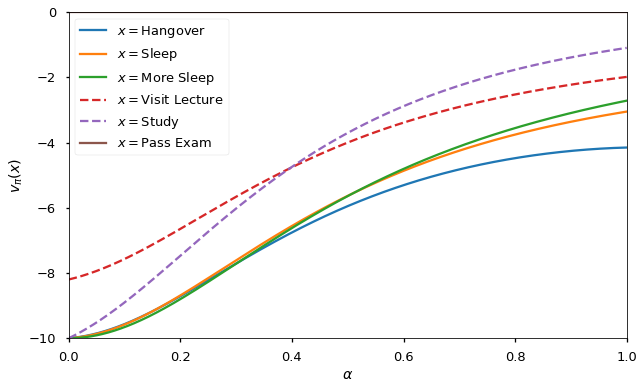

In [4]:
plt.figure(figsize=[10, 6])
states = np.array(["Hangover", "Sleep", "More Sleep", "Visit Lecture", "Study", "Pass Exam"])
for n_idx in range(n):
    if (n_idx == 3) or (n_idx == 4):
        plt.plot(alphas, v_n_alpha[n_idx, :], "--", label=r"$x=${}".format(states[n_idx]))
    else:
        plt.plot(alphas, v_n_alpha[n_idx, :], label=r"$x=${}".format(states[n_idx]))
    
plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$v_\pi(x)$")
plt.xlim([0, 1])
plt.ylim([-10, 0])

If you are rather lazy (low $\alpha$), there is a good chance a studying session will end in just going to sleep. Hence, your chance (in general) to pass is lower if you tend to be lazy (due to lower $v_\pi(x)$), but you should at least visit the lecture in order to go to the exam.

If you are more productive (high $\alpha$), studying raises your chances for passing significantly.

Result: In order to be as lazy as possible, please visit the lecture :)